In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import XGBRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,mean_squared_error

In [2]:
df=pd.read_excel('Cleaned.xlsx')

In [3]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [4]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

In [19]:
xgb=XGBRegressor(colsample_bytree=1,learning_rate=0.5,max_depth=3,subsample=0.5)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, ...)

In [21]:
y_train_pred=xgb.predict(X_train)

In [23]:
crossvalidation=cross_val_score(xgb,X_train,y_train,cv=5,scoring='r2').mean()
train_r2=r2_score(y_train,y_train_pred)
train_mse=mean_squared_error(y_train,y_train_pred)
train_mae=mean_absolute_error(y_train,y_train_pred)
train_rmse=root_mean_squared_error(y_train,y_train_pred)


In [25]:
print('crossvalidation:',crossvalidation)
print('train_r2:',train_r2)
print('train_mse:',train_mse)
print('train_mae:',train_mae)
print('train_rmse:',train_rmse)

crossvalidation: 0.9210640330281274
train_r2: 0.9990464997109777
train_mse: 0.02359529746295648
train_mae: 0.11485079252681994
train_rmse: 0.15360760874044124


In [35]:
xgb.feature_importances_

array([0.14365211, 0.5240054 , 0.04256402, 0.2587559 , 0.01152732,
       0.01949525], dtype=float32)

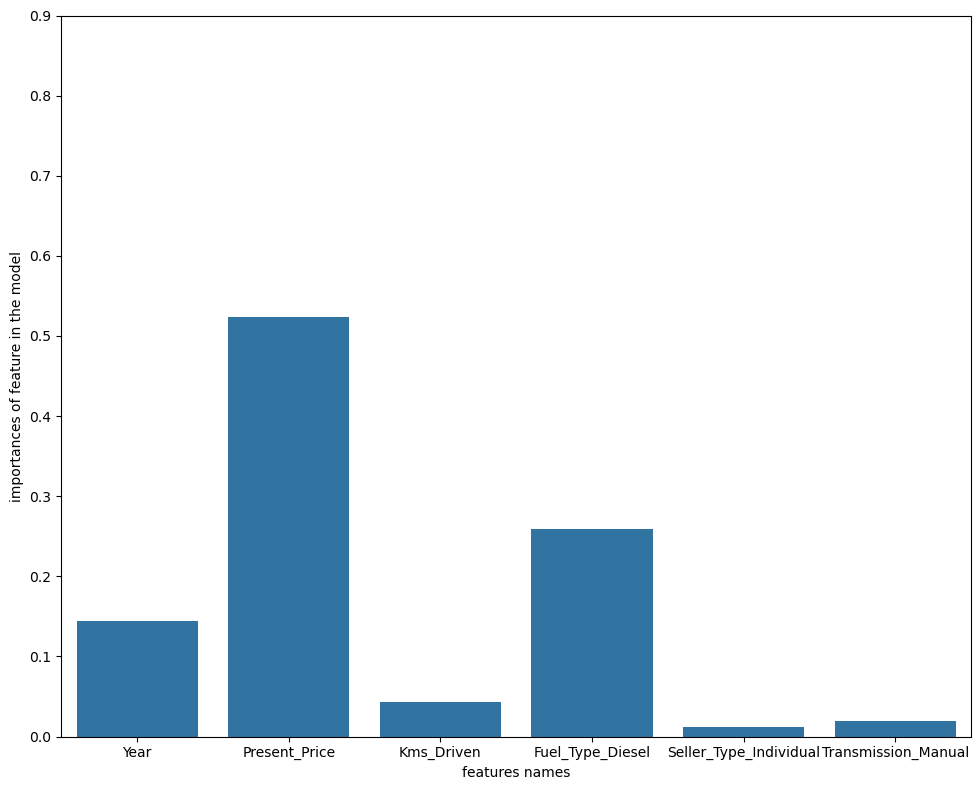

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x=X.columns,y=xgb.feature_importances_)

plt.xlabel('features names')
plt.ylabel('importances of feature in the model')
plt.yticks(np.arange(0.0,1,0.1))
plt.tight_layout()
plt.show()

In [12]:
#Prediction
y_test_pred=xgb.predict(X_test)

**Evaluation Metrics**

In [29]:
test_r2=r2_score(y_test,y_test_pred)
test_mae=mean_absolute_error(y_test,y_test_pred)
test_rmse=root_mean_squared_error(y_test,y_test_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
test_mae=mean_absolute_error(y_test,y_test_pred)

In [31]:
print('test_mae:',test_mae)
print('test_mse:',test_mse)
print('test_rmse:',test_rmse)
print('test_r2:',test_r2)

test_mae: 0.5366023748119672
test_mse: 0.6821399185361071
test_rmse: 0.825917622124693
test_r2: 0.9726177571761382


In [17]:
estimator=XGBRegressor()
param_grid={'learning_rate':[0.01,0.05,0.1,0.5,1],
           'max_depth':list(range(1,10)),
            'subsample':[0.01,0.05,0.1,0.5,1],
            'colsample_bytree':[0.01,0.05,0.1,0.5,1]}
gd=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
gd.fit(X_train,y_train)
gd.best_params_


{'colsample_bytree': 1, 'learning_rate': 0.5, 'max_depth': 3, 'subsample': 0.5}